# [House Price Predict With Simple Linear Regression]

- 1. Libraries and Data Loading
- 2. Check Correlation Beetween Independent and Dependent Feature
- 3. Target Engineering
- 4. Assume Linear Regression Checking
- 5. Autocorelation Checking
- 6. Check homoscedastic
- 7. Multicolinearity and Linearity Checking
- 8. Machine Learning Models

# Libraries and Data Loading

In [140]:
import pandas as pd
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
np.set_printoptions(threshold=sys.maxsize)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [141]:
dfRaw = pd.read_csv("kc_house_data.csv")
df = pd.read_csv("kc_house_data.csv")
# https://www.kaggle.com/shivachandel/kc-house-data

In [142]:
df.shape

(21613, 21)

In [143]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


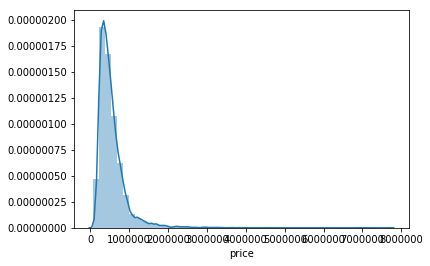

In [144]:
# Check distribution of the salesprice
sns.distplot(df['price'])

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21611 non-null float64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(6), int64(14), object(1)
memory usage: 3.5+ MB


In [146]:
idxNan = df[df['sqft_above'].isna() == True].index
df = df.drop(idxNan)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 21 columns):
id               21611 non-null int64
date             21611 non-null object
price            21611 non-null float64
bedrooms         21611 non-null int64
bathrooms        21611 non-null float64
sqft_living      21611 non-null int64
sqft_lot         21611 non-null int64
floors           21611 non-null float64
waterfront       21611 non-null int64
view             21611 non-null int64
condition        21611 non-null int64
grade            21611 non-null int64
sqft_above       21611 non-null float64
sqft_basement    21611 non-null int64
yr_built         21611 non-null int64
yr_renovated     21611 non-null int64
zipcode          21611 non-null int64
lat              21611 non-null float64
long             21611 non-null float64
sqft_living15    21611 non-null int64
sqft_lot15       21611 non-null int64
dtypes: float64(6), int64(14), object(1)
memory usage: 3.6+ MB


In [147]:
# See correlation on numeric feature
numeric_feats = df.dtypes[df.dtypes != 'object'].index

In [148]:
numeric_feats

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

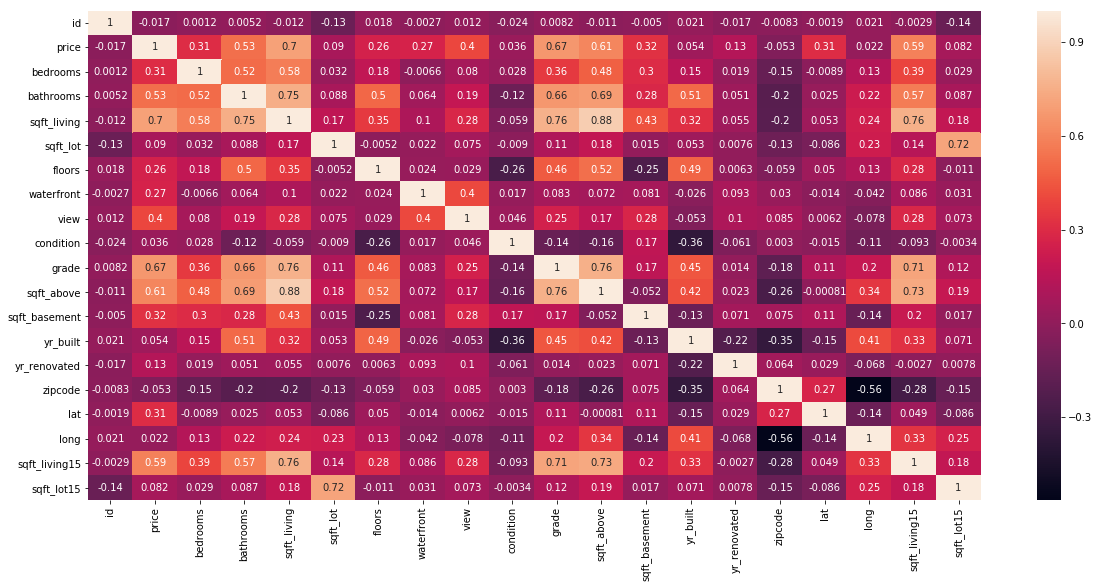

In [149]:
cormat = df[numeric_feats].corr()

plt.subplots(figsize=(20,9))
sns.heatmap(cormat, annot=True)

#### no need feature engineering because almost all features have int value except id

#### no need missing value handling because there is no missing value in this data set

# Target Engineering

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1300c83c8>,
      dtype=object)

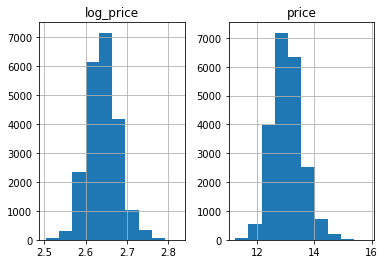

In [57]:
prices = pd.DataFrame({'price': df['price'], 'log_price': np.log1p(df['price'])})
prices.hist()

In [58]:
df['price'] = np.log1p(df['price'])

# Assume Linear Regression Checking

In [150]:
X = df.drop(['id','price','date'], axis=1)
y = df['price']

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= 101)


In [152]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [153]:
lm.intercept_ 

7110510.476754108

In [154]:
pd.DataFrame(index = X_train.columns, data=lm.coef_, columns=['Coeficient'])

,Coeficient
bedrooms,-40809.319310
bathrooms,41456.799297
sqft_living,116.278535
sqft_lot,0.171096
floors,10891.548386
waterfront,624597.325388
view,52171.746960
condition,24295.929925
grade,93143.075206
sqft_above,71.127373


# Autocorelation Checking

In [155]:
# Checking for auto to ensure the absence of autocorrelation we use Ljungbox test.
# Null Hypothesis: Autocorrelation is absent.
# Alternative Hypothesis: Autocorrelation is present.

from statsmodels.stats import diagnostic

diagnostic.acorr_ljungbox(result.resid, lags = 1)
# (array([0.11361914]), array([0.73606083]))
# [0.11361914] = ttest
# [0.73606083] = pvalue
# kesimpulan : H0 Accepted, there is no autocorrelation (p-value > 0.05)

(array([0.11361914]), array([0.73606083]))

# Check homoscedastic

In [156]:
# Checking heteroscedasticity using Goldfelf Quandt we test for heteroscedasticity
# null hypothesis: Error terms are homoscedastic
# Alternative Hypothesis : error terms are heteroscedasticity

# variance checking. equal or not equal

import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(result.resid, result.model.exog)
lzip(name, test)

# the result is homoscedastic. H0 accepted. (p-value > 0.05)


[('F statistic', 0.9704407035254785), ('p-value', 0.9037331310056287)]

# Multicolinearity and Linearity Checking

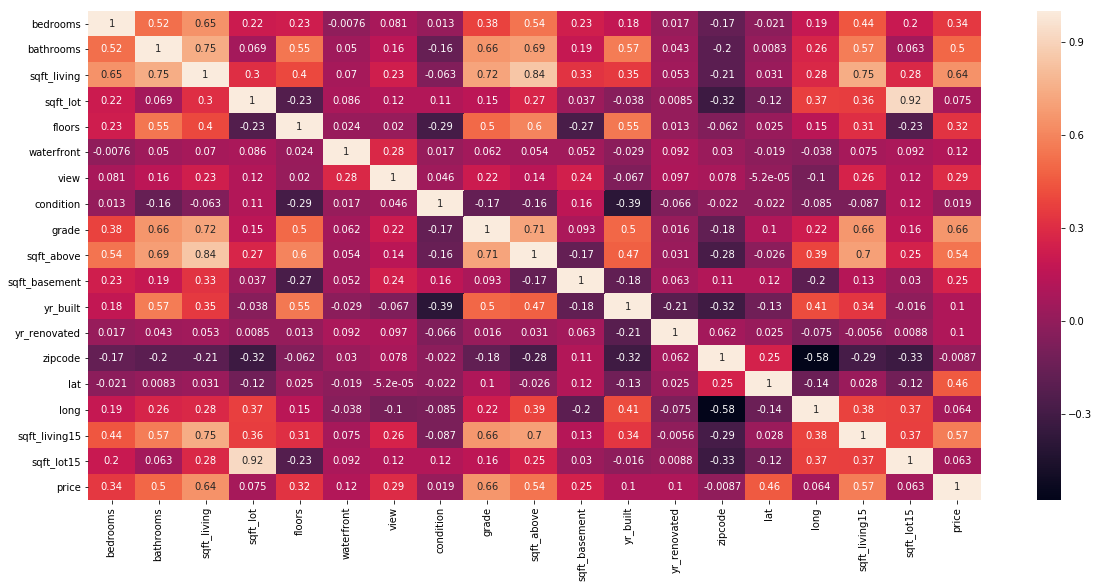

In [157]:
plt.subplots(figsize=(20,9))
sns.heatmap(pd.concat([X, y], axis=1).corr('spearman'), annot = True)
# monotonik, not be affected by oulier, so there is different result with pearson heatmap


# Modelling

In [158]:
from sklearn import metrics

In [164]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

print('Result Model Performance Multi Linear Regression : ')
print('')

print('Y Train')
print('MAE:', metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('R2  Score:', metrics.r2_score(y_train, y_train_pred))

print('')

print('Y Test')
print('MAE:', metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('R2  Score:', metrics.r2_score(y_test, y_test_pred))



Result Model Performance Multi Linear Regression : 

Y Train
MAE: 126714.38140022219
MSE: 40616518963.593895
RMSE: 201535.40374731657
R2  Score: 0.70048352232792

Y Test
MAE: 125195.27497894644
MSE: 40317095936.207794
RMSE: 200791.17494603142
R2  Score: 0.6965801316187185


In [162]:
model_ridge = RidgeCV(alphas=[1,0.1,0.01,0.0005])
model_ridge.fit(X_train, y_train)

y_train_pred = model_ridge.predict(X_train)
y_test_pred = model_ridge.predict(X_test)

print('Result Model Performance Multi Linear Regression : ')
print('')

print('Y Train')
print('MAE:', metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('R2  Score:', metrics.r2_score(y_train, y_train_pred))

print('')

print('Y Test')
print('MAE:', metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('R2  Score:', metrics.r2_score(y_test, y_test_pred))




Result Model Performance Multi Linear Regression : 

Y Train
MAE: 126692.34237980895
MSE: 40630531620.93191
RMSE: 201570.16550306225
R2  Score: 0.700380189450662

Y Test
MAE: 125207.98504325602
MSE: 40314482686.464134
RMSE: 200784.66745860883
R2  Score: 0.6965997985087773


In [163]:
model_lasso = LassoCV(alphas=[1,0.1,0.01,0.0005])
model_lasso.fit(X_train, y_train)

y_train_pred = model_lasso.predict(X_train)
y_test_pred = model_lasso.predict(X_test)

print('Result Model Performance Multi Linear Regression : ')
print('')

print('Y Train')
print('MAE:', metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('R2  Score:', metrics.r2_score(y_train, y_train_pred))

print('')

print('Y Test')
print('MAE:', metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('R2  Score:', metrics.r2_score(y_test, y_test_pred))



Result Model Performance Multi Linear Regression : 

Y Train
MAE: 126714.38088858852
MSE: 40616518963.59405
RMSE: 201535.40374731694
R2  Score: 0.7004835223279189

Y Test
MAE: 125195.27431762354
MSE: 40317095758.48444
RMSE: 200791.17450347374
R2  Score: 0.6965801329562353


ridge regression has the best result with the lowest RMSE

# Check Feature Importance

In [165]:
coef = pd.Series(model_ridge.fit(X,y).coef_, index = X.columns)

In [166]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

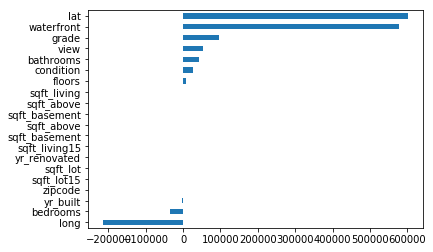

In [167]:
imp_coef.plot(kind='barh')

# Export model to Pickle file

In [ ]:
# import pickle
# model_lasso.fit(X,y)
# pickle.dumo(model_lr, open('model.pkl', 'w'))